In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [9]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('augmented')
  plt.imshow(augmented)

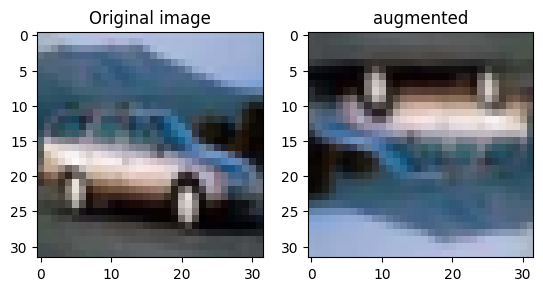

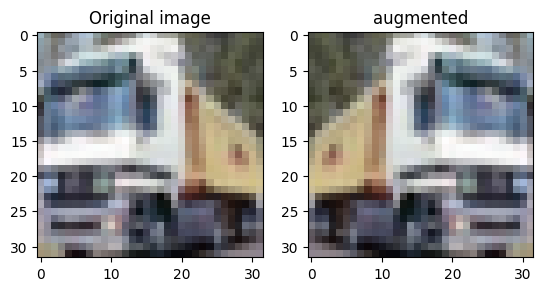

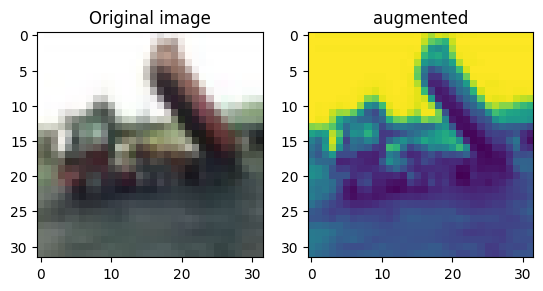

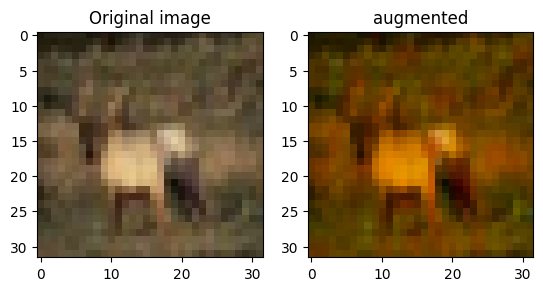

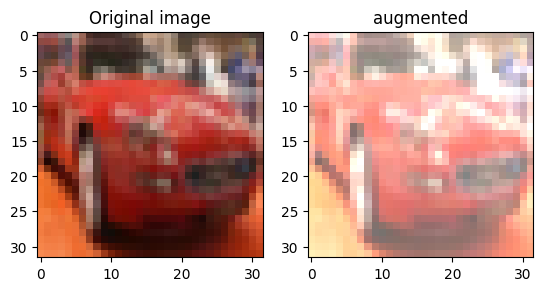

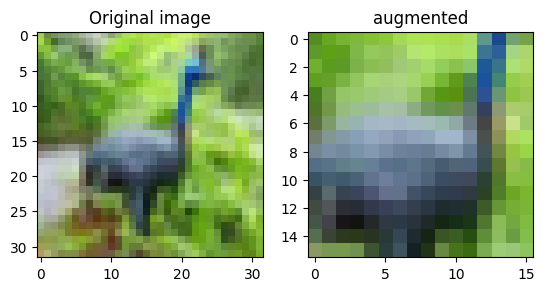

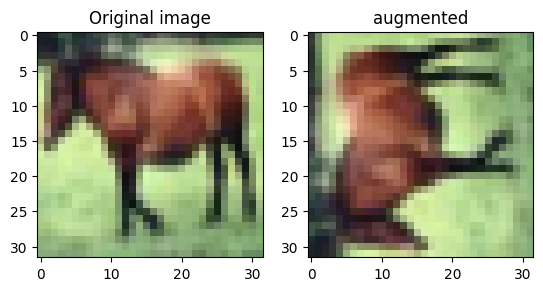

In [10]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)])

data_aug = data_augmentation(train_images[4])
visualize(train_images[4], data_aug)

flipped = tf.image.flip_left_right(train_images[1])
visualize(train_images[1], flipped)

grayscaled = tf.image.rgb_to_grayscale(train_images[2])
visualize(train_images[2], tf.squeeze(grayscaled))

saturated = tf.image.adjust_saturation(train_images[3], 3)
visualize(train_images[3], saturated)

bright = tf.image.adjust_brightness(train_images[5], 0.4)
visualize(train_images[5], bright)

cropped = tf.image.central_crop(train_images[6], central_fraction=0.5)
visualize(train_images[6], cropped)

rotated = tf.image.rot90(train_images[7])
visualize(train_images[7], rotated)

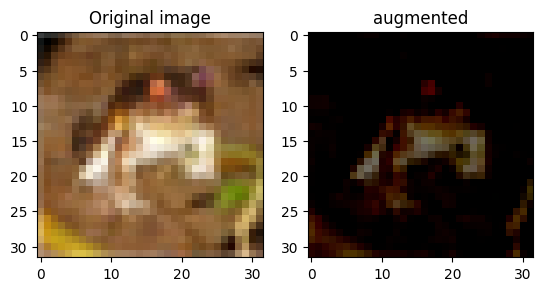

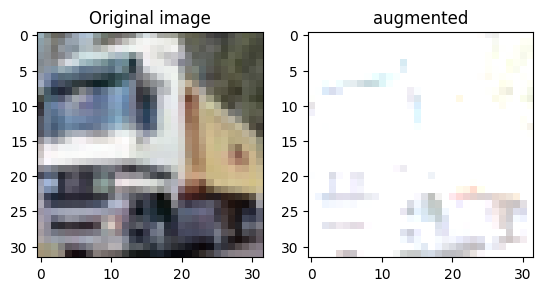

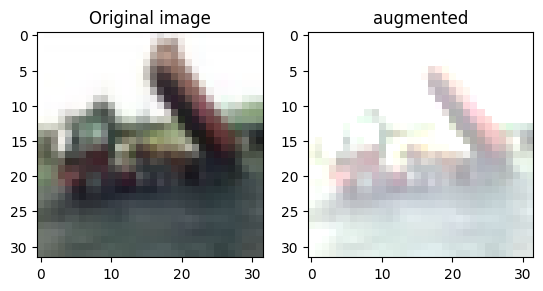

In [11]:
for i in range(3):
  seed = (i, 0)
  brightness = tf.image.stateless_random_brightness(train_images[i], max_delta=0.95, seed=seed)
  visualize(train_images[i], brightness)

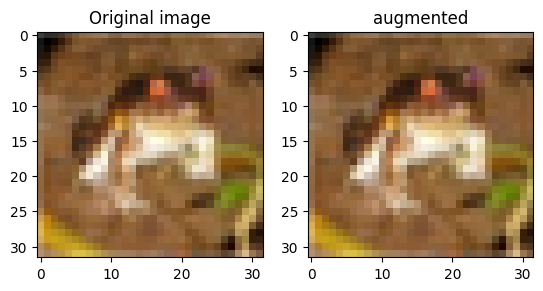

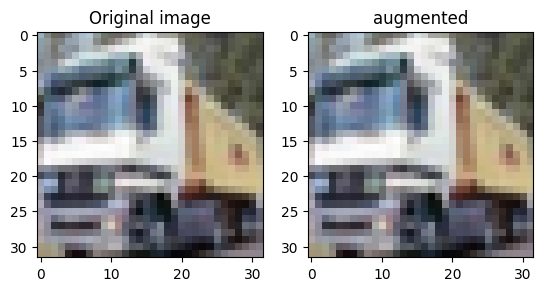

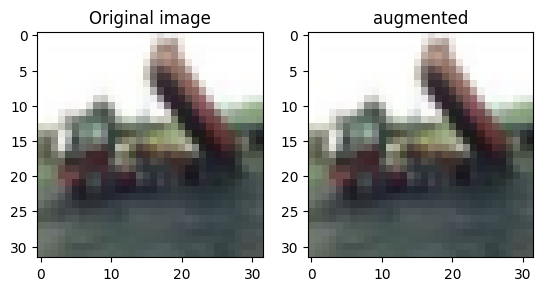

In [17]:
for i in range(3):
  seed = (i, 0)
  crop = tf.image.stateless_random_crop(train_images[i], size=[32,32, 3], seed=seed)
  visualize(train_images[i], crop)

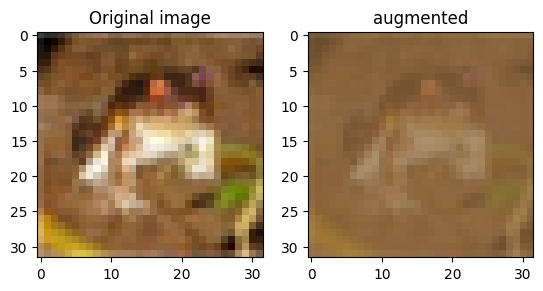

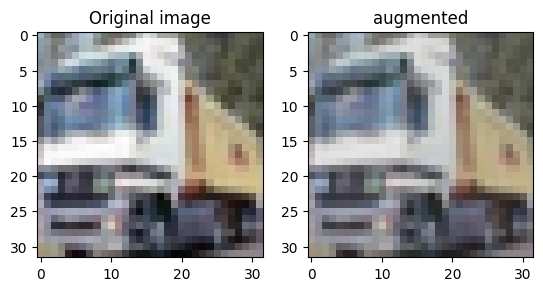

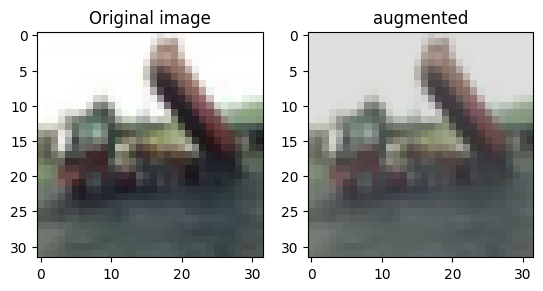

In [19]:
for i in range(3):
  seed = (i, 0)
  contrast = tf.image.stateless_random_contrast(train_images[i], lower=0.1, upper=0.9, seed=seed)
  visualize(train_images[i], contrast)